In [5]:
import matplotlib.pyplot as plt

from z3 import *
import numpy as np


def z3max(x,y):
    return If((x)>y,x,y)
def z3min(x,y):
    return If(x<y,x,y)


In [6]:
# Create the warehouse environment
warehouse = []

for i in range(4):
    for j in range(10):
        warehouse.append((2*i+1+2, j+1))

# Print the list of coordinates
print(warehouse)
drone=(0,0)

[(3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (9, 10)]


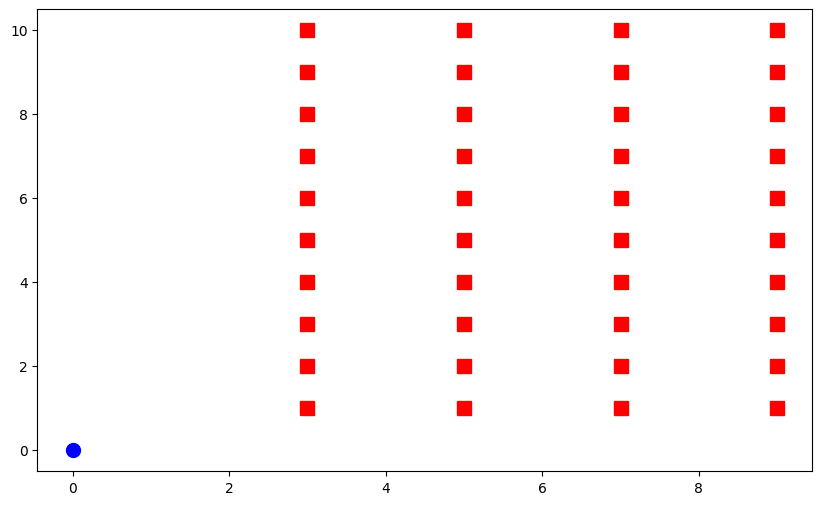

In [7]:
# Plot the warehouse environment and drone's path
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the coordinates
for x, y in warehouse:
    ax.plot(x, y, 'rs', markersize=10)

ax.plot(drone[0], drone[1], 'bo', markersize=10)

plt.show()
ax.set_aspect('equal')


In [8]:
# ss = Optimize()
ss = Solver()

timesteps=100
bmax=100
gridx= 9
gridy=10


#vars
PGx=IntVector('pgx',timesteps)
PGy=IntVector('pgy',timesteps)
Bat=IntVector('bat',timesteps)

#lims
con=[And(1<=b,b<=bmax) for b in Bat]
ss.add(con)

con=[And(0<=x,x<=gridx) for x in PGx]
ss.add(con)

con=[And(0<=y,y<=gridy) for y in PGy]
ss.add(con)

#initial
ss.add(PGx[0]==0)
ss.add(PGy[0]==0)
ss.add(Bat[0]==bmax)

#motion and recharge

for k in range(1,timesteps):
    ss.add(Or(PGx[k]==PGx[k-1]+1,PGx[k]==PGx[k-1]-1,PGx[k]==PGx[k-1]))
    ss.add(Or(PGy[k]==PGy[k-1]+1,PGy[k]==PGy[k-1]-1,PGy[k]==PGy[k-1]))

    ss.add(Implies(Or(And(PGx[k]==PGx[k-1]+1,PGy[k]==PGy[k-1]+1,Not(PGx[k]==0),Not(PGy[k]==0)),And(PGx[k]==PGx[k-1]-1,PGy[k]==PGy[k-1]-1),Not(PGx[k]==0),Not(PGy[k]==0)),Bat[k]==Bat[k-1]-3))
    ss.add(Implies(Or(And(PGx[k]==PGx[k-1]+1,PGy[k]==PGy[k-1]-1,Not(PGx[k]==0),Not(PGy[k]==0)),And(PGx[k]==PGx[k-1]-1,PGy[k]==PGy[k-1]+1,Not(PGx[k]==0),Not(PGy[k]==0))),Bat[k]==Bat[k-1]-3))
    ss.add(Implies(Or(And(PGx[k]==PGx[k-1]+1,PGy[k]==PGy[k-1],Not(PGx[k]==0),Not(PGy[k]==0)),And(PGx[k]==PGx[k-1]-1,PGy[k]==PGy[k-1],Not(PGx[k]==0),Not(PGy[k]==0))),Bat[k]==Bat[k-1]-2))
    ss.add(Implies(Or(And(PGx[k]==PGx[k-1],PGy[k]==PGy[k-1]-1),And(PGx[k]==PGx[k-1],PGy[k]==PGy[k-1]+1)),Bat[k]==Bat[k-1]-2))
    ss.add(Implies(And(PGx[k]==PGx[k-1],PGy[k]==PGy[k-1],Not(PGx[k]==0),Not(PGy[k]==0)),Bat[k]==Bat[k-1]))
    ss.add(Implies(And(PGx[k]==0,PGy[k]==0),Bat[k]==bmax))


#task
for x, y in warehouse:
    con=[]
    for k in range(timesteps):
        con.append(And(PGx[k]==x,PGy[k]==y))
    ss.add(Or(con))


print(ss.check()   )
a=ss.model()
